# Support Vector Machine (SVM)

This notebook will explain the idea behind SVMs. I will **not** be implementing the whole thing because that dabbles in some advanced convex optimization concepts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

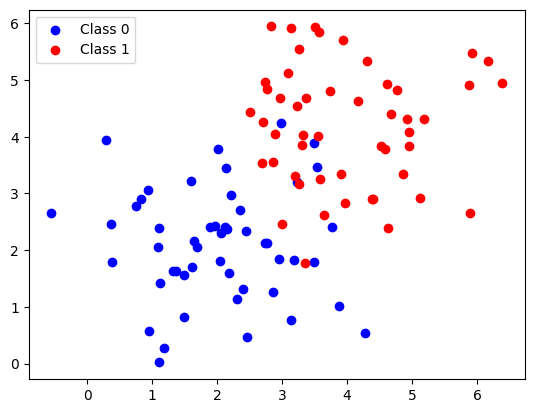

In [14]:
np.random.seed(0)

# Class 0: centered around (2, 2)
X0 = np.random.randn(50, 2) + np.array([2, 2])
y0 = np.zeros(50)

# Class 1: centered around (4, 4)
X1 = np.random.randn(50, 2) + np.array([4, 4])
y1 = np.ones(50)

# Combine them
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1')
plt.legend()
plt.show()

The idea of SVMs is to find a line (or hyperplane) that splits the data as well as possible. With my data, the line isn't going to perfectly seperate the classes. But it does a good enough of a job. This line is found by minimizing the **hinge loss**.

$L_i=\max \{0, y_i(w^Tx_i)\}$

With $\{-1, 1\}$ -classes, that gives $0$ loss for correctly classified samples and $>0$ for incorrectly classified.

We still want to find the maximum margin, so we add a punishment for high weights and a C coefficient for the weight given to incorrect classifications.

(real SVMs don't do this via gradient descent)

In [19]:
# Convert {0,1} -> {-1,+1} for hinge loss
y_train_signed = np.where(y_train == 1, 1, -1)

def hinge_loss(w, b, X, y, C=1.0):
    """
    Standard SVM objective:
    (1/2)||w||^2 + C * sum(max(0, 1 - y*(w·x + b)))
    """
    margins = 1 - y * (X @ w + b)
    loss = 0.5 * np.dot(w, w) + C * np.sum(np.maximum(0, margins))
    return loss

def hinge_grad(w, b, X, y, C=1.0):
    margins = 1 - y * (X @ w + b)
    indicator = (margins > 0).astype(float)

    grad_w = w - C * np.sum((indicator * y)[:, None] * X, axis=0)
    grad_b = -C * np.sum(indicator * y)

    return grad_w, grad_b

w = np.zeros(2)
b = 0.0
lr = 0.001
C = 1.0

for _ in range(2000):
    grad_w, grad_b = hinge_grad(w, b, X_train, y_train_signed, C=C)
    w -= lr * grad_w
    b -= lr * grad_b

print("Learned w:", w)
print("Learned b:", b)
print("Final hinge loss:", hinge_loss(w, b, X_train, y_train_signed, C))


Learned w: [0.92521237 0.8341929 ]
Learned b: -5.393000000000046
Final hinge loss: 18.454465001558138


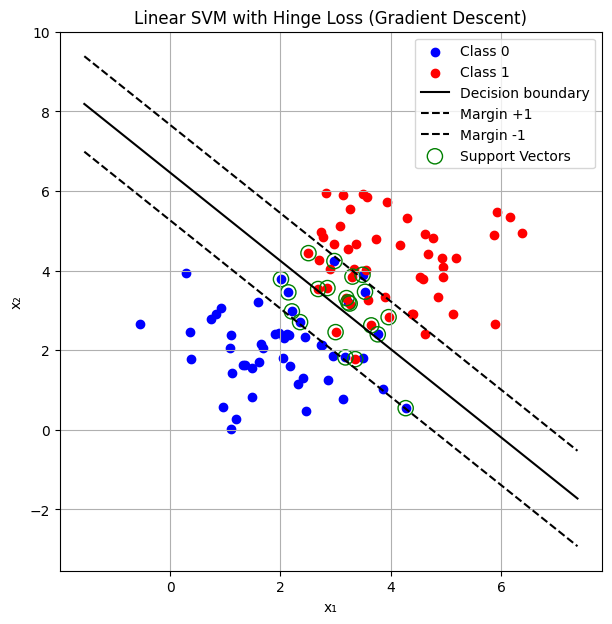

In [22]:
plt.figure(figsize=(7, 7))

plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1')

# decision boundary
x_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k-', label='Decision boundary')

# margins
y_vals_pos = -(w[0] * x_vals + b - 1) / w[1]
y_vals_neg = -(w[0] * x_vals + b + 1) / w[1]    
plt.plot(x_vals, y_vals_pos, 'k--', label='Margin +1')
plt.plot(x_vals, y_vals_neg, 'k--', label='Margin -1')

# Support vectors
margins = y_train_signed * (X_train @ w + b)
sv_mask = margins < 1
plt.scatter(X_train[sv_mask][:,0], X_train[sv_mask][:,1],
            s=120, facecolors='none', edgecolors='green',
            label='Support Vectors')

plt.legend()
plt.title("Linear SVM with Hinge Loss (Gradient Descent)")    
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.show()


## (WIP)